<a href="https://colab.research.google.com/github/bpandey369/AQI-Thesis/blob/main/Thesis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')



In [ ]:
pm17 = pd.read_csv('/content/PM2.5_2017.csv',na_values=[-999.0,-999])
pm18 = pd.read_csv('/content/PM2.5_2018.csv',na_values=[-999.0,-999])
pm19 = pd.read_csv('/content/PM2.5_2019.csv',na_values=[-999.0,-999])
pm20 = pd.read_csv('/content/PM2.5_2020.csv',na_values=[-999.0,-999])
pm21 = pd.read_csv('/content/PM2.5_2021.csv',na_values=[-999.0,-999])
pm22 = pd.read_csv('/content/PM2.5_2022.csv',na_values=[-999.0,-999])
pm23 = pd.read_csv('/content/PM2.5_2023.csv',na_values=[-999.0,-999])
pm23_9 = pd.read_csv('/content/PM2.5_2023_09.csv',na_values=[-999.0,-999])

In [ ]:
oz17 = pd.read_csv('/content/OZONE_2017.csv',na_values=[-999.0,-999])
oz18 = pd.read_csv('/content/OZONE_2018.csv',na_values=[-999.0,-999])
oz19 = pd.read_csv('/content/OZONE_2019.csv',na_values=[-999.0,-999])
oz20 = pd.read_csv('/content/OZONE_2020.csv',na_values=[-999.0,-999])
oz21 = pd.read_csv('/content/OZONE_2021.csv',na_values=[-999.0,-999])
oz22 = pd.read_csv('/content/OZONE_2022.csv',na_values=[-999.0,-999])

In [ ]:
pm_list = [pm17,pm18,pm19,pm20,pm21,pm22,pm23,pm23_9]
data_pm = pd.concat(pm_list, ignore_index= True)

In [ ]:
oz_list = [oz17,oz18,oz19,oz20,oz21,oz22]
data_oz = pd.concat(oz_list, ignore_index= True)

In [ ]:
data_pm.shape

(57920, 14)

In [ ]:
data_oz.shape

(50691, 14)

In [ ]:
data_pm.sample(5)

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
50200,Phora Durbar Kathmandu,PM2.5 - Principal,2022-10-22 02:00 PM,2022,10,22,14,17.3,62.0,Moderate,13.0,UG/M3,1 Hr,Valid
6455,Phora Durbar Kathmandu,PM2.5 - Principal,2017-09-27 12:00 AM,2017,9,27,0,29.5,88.0,Moderate,24.0,UG/M3,1 Hr,Valid
10657,Phora Durbar Kathmandu,PM2.5 - Principal,2018-03-28 08:00 AM,2018,3,28,8,184.2,234.0,Very Unhealthy,208.0,UG/M3,1 Hr,Valid
50778,Phora Durbar Kathmandu,PM2.5 - Principal,2022-11-15 07:00 PM,2022,11,15,19,43.4,120.0,Unhealthy for Sensitive Groups,48.0,UG/M3,1 Hr,Valid
18990,Phora Durbar Kathmandu,PM2.5 - Principal,2019-03-17 06:00 PM,2019,3,17,18,47.8,131.0,Unhealthy for Sensitive Groups,47.0,UG/M3,1 Hr,Valid


In [ ]:
data_oz.sample(5)

,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
22710,Phora Durbar Kathmandu,O3,2019-08-18 11:00 PM,2019,8,18,23,5.0,5.0,Good,4.0,PPB,1 Hr,Valid
26172,Phora Durbar Kathmandu,O3,2020-01-12 05:00 AM,2020,1,12,5,0.0,0.0,Good,0.0,PPB,1 Hr,Valid
27342,Phora Durbar Kathmandu,O3,2020-02-29 11:00 PM,2020,2,29,23,4.0,4.0,Good,0.0,PPB,1 Hr,Valid
17394,Phora Durbar Kathmandu,O3,2019-01-01 01:00 PM,2019,1,1,13,NaN,NaN,NaN,55.0,PPB,1 Hr,Valid
49986,Phora Durbar Kathmandu,O3,2022-11-24 03:00 AM,2022,11,24,3,4.0,4.0,Good,8.0,PPB,1 Hr,Valid


In [ ]:
df = pd.merge(data_pm,data_oz,how='left',on='Date (LT)')

In [ ]:
df.sample()

,Site_x,Parameter_x,Date (LT),Year_x,Month_x,Day_x,Hour_x,NowCast Conc._x,AQI_x,AQI Category_x,...,Month_y,Day_y,Hour_y,NowCast Conc._y,AQI_y,AQI Category_y,Raw Conc._y,Conc. Unit_y,Duration_y,QC Name_y
16184,Phora Durbar Kathmandu,PM2.5 - Principal,2018-11-14 11:00 AM,2018,11,14,11,94.7,171.0,Unhealthy,...,11.0,14.0,11.0,46.0,43.0,Good,46.0,PPB,1 Hr,Valid


In [ ]:
df.shape

(57926, 27)

In [ ]:
df.columns

Index(['Site_x', 'Parameter_x', 'Date (LT)', 'Year_x', 'Month_x', 'Day_x',
       'Hour_x', 'NowCast Conc._x', 'AQI_x', 'AQI Category_x', 'Raw Conc._x',
       'Conc. Unit_x', 'Duration_x', 'QC Name_x', 'Site_y', 'Parameter_y',
       'Year_y', 'Month_y', 'Day_y', 'Hour_y', 'NowCast Conc._y', 'AQI_y',
       'AQI Category_y', 'Raw Conc._y', 'Conc. Unit_y', 'Duration_y',
       'QC Name_y'],
      dtype='object')

In [ ]:
df = df[['Date (LT)','NowCast Conc._x', 'AQI_x', 'AQI Category_x', 'Raw Conc._x',
       'QC Name_x','NowCast Conc._y', 'AQI_y','AQI Category_y', 'Raw Conc._y','QC Name_y']]

In [ ]:
df.sample(5)

,Date (LT),NowCast Conc._x,AQI_x,AQI Category_x,Raw Conc._x,QC Name_x,NowCast Conc._y,AQI_y,AQI Category_y,Raw Conc._y,QC Name_y
8258,2017-12-11 01:00 AM,115.6,182.0,Unhealthy,94.0,Valid,6.0,6.0,Good,7.0,Valid
43092,2021-12-29 01:00 PM,27.2,83.0,Moderate,28.0,Valid,NaN,NaN,NaN,NaN,NaN
49330,2022-09-16 02:00 AM,13.4,54.0,Moderate,9.0,Valid,7.0,6.0,Good,8.0,Valid
54941,2023-05-09 04:00 PM,22.0,72.0,Moderate,20.0,Valid,NaN,NaN,NaN,NaN,NaN
6615,2017-10-03 02:00 PM,17.5,62.0,Moderate,12.0,Valid,51.0,47.0,Good,49.0,Valid


In [ ]:
df = df.rename(columns={'Date (LT)': 'date','NowCast Conc._x':'pm_cast', 'AQI_x':'pm_aqi', 'AQI Category_x':'pm_aqi_category', 'Raw Conc._x':'pm_raw',
       'QC Name_x':'pm_qc','NowCast Conc._y':'o3_cast', 'AQI_y':'o3_aqi','AQI Category_y':'o3_aqi_category', 'Raw Conc._y':'o3_raw','QC Name_y':'o3_qc'})

In [ ]:
df.describe()

,pm_cast,pm_aqi,pm_raw,o3_cast,o3_aqi,o3_raw
count,56361.000000,56353.000000,56273.000000,44350.000000,44296.000000,48702.000000
mean,50.835104,113.783224,51.507792,22.663901,22.755260,22.758408
std,41.916355,53.746069,50.096553,17.999821,23.155487,20.020347
min,-1.400000,0.000000,-15.000000,-3.000000,0.000000,-21.000000
25%,19.500000,67.000000,19.000000,8.000000,7.000000,6.000000
50%,39.000000,110.000000,38.000000,18.000000,17.000000,17.000000
75%,70.900000,159.000000,70.000000,33.000000,31.000000,36.000000
max,662.900000,607.000000,985.000000,135.000000,232.000000,135.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57926 entries, 0 to 57925
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             57926 non-null  object 
 1   pm_cast          56361 non-null  float64
 2   pm_aqi           56353 non-null  float64
 3   pm_aqi_category  56353 non-null  object 
 4   pm_raw           56273 non-null  float64
 5   pm_qc            57926 non-null  object 
 6   o3_cast          44350 non-null  float64
 7   o3_aqi           44296 non-null  float64
 8   o3_aqi_category  44296 non-null  object 
 9   o3_raw           48702 non-null  float64
 10  o3_qc            50526 non-null  object 
dtypes: float64(6), object(5)
memory usage: 5.3+ MB


In [ ]:
df.corr()

<ipython-input-19-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,pm_cast,pm_aqi,pm_raw,o3_cast,o3_aqi,o3_raw
pm_cast,1.000000,0.937013,0.892786,-0.008549,0.040677,-0.021568
pm_aqi,0.937013,1.000000,0.829601,0.044992,0.087879,0.034140
pm_raw,0.892786,0.829601,1.000000,-0.038173,0.002556,-0.064521
o3_cast,-0.008549,0.044992,-0.038173,1.000000,0.946894,0.964372
o3_aqi,0.040677,0.087879,0.002556,0.946894,1.000000,0.904449
o3_raw,-0.021568,0.034140,-0.064521,0.964372,0.904449,1.000000


In [ ]:
df[1340:]

,date,pm_cast,pm_aqi,pm_aqi_category,pm_raw,pm_qc,o3_cast,o3_aqi,o3_aqi_category,o3_raw,o3_qc
1340,2017-02-25 09:00 PM,82.0,165.0,Unhealthy,86.0,Valid,32.0,30.0,Good,27.0,Valid
1341,2017-02-25 10:00 PM,79.5,163.0,Unhealthy,77.0,Valid,30.0,28.0,Good,29.0,Valid
1342,2017-02-25 11:00 PM,81.1,164.0,Unhealthy,86.0,Valid,28.0,26.0,Good,25.0,Valid
1343,2017-02-26 12:00 AM,81.9,165.0,Unhealthy,84.0,Valid,23.0,21.0,Good,19.0,Valid
1344,2017-02-26 01:00 AM,85.2,166.0,Unhealthy,94.0,Valid,23.0,21.0,Good,22.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...
57921,2023-09-10 09:00 PM,19.5,67.0,Moderate,22.0,Valid,NaN,NaN,NaN,NaN,NaN
57922,2023-09-10 10:00 PM,15.2,58.0,Moderate,11.0,Valid,NaN,NaN,NaN,NaN,NaN
57923,2023-09-10 11:00 PM,16.1,59.0,Moderate,17.0,Valid,NaN,NaN,NaN,NaN,NaN
57924,2023-09-11 12:00 AM,17.0,61.0,Moderate,18.0,Valid,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57926 entries, 0 to 57925
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             57926 non-null  datetime64[ns]
 1   pm_cast          56361 non-null  float64       
 2   pm_aqi           56353 non-null  float64       
 3   pm_aqi_category  56353 non-null  object        
 4   pm_raw           56273 non-null  float64       
 5   pm_qc            57926 non-null  object        
 6   o3_cast          44350 non-null  float64       
 7   o3_aqi           44296 non-null  float64       
 8   o3_aqi_category  44296 non-null  object        
 9   o3_raw           48702 non-null  float64       
 10  o3_qc            50526 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 5.3+ MB


In [ ]:
df.sample()

,date,pm_cast,pm_aqi,pm_aqi_category,pm_raw,pm_qc,o3_cast,o3_aqi,o3_aqi_category,o3_raw,o3_qc
16970,2018-12-17 06:00:00,103.7,176.0,Unhealthy,115.0,Valid,1.0,1.0,Good,1.0,Valid


In [ ]:
df.set_index('date', inplace = True)

In [ ]:
df['2017-03-01 01:00:00':]

,pm_cast,pm_aqi,pm_aqi_category,pm_raw,pm_qc,o3_cast,o3_aqi,o3_aqi_category,o3_raw,o3_qc
date,,,,,,,,,,
2017-03-01 01:00:00,144.5,197.0,Unhealthy,154.0,Valid,2.0,2.0,Good,2.0,Valid
2017-03-01 02:00:00,134.0,192.0,Unhealthy,122.0,Valid,8.0,7.0,Good,8.0,Valid
2017-03-01 03:00:00,125.9,187.0,Unhealthy,114.0,Valid,6.0,6.0,Good,6.0,Valid
2017-03-01 04:00:00,128.0,188.0,Unhealthy,131.0,Valid,8.0,7.0,Good,8.0,Valid
2017-03-01 05:00:00,131.0,190.0,Unhealthy,136.0,Valid,6.0,6.0,Good,6.0,Valid
...,...,...,...,...,...,...,...,...,...,...
2023-09-10 21:00:00,19.5,67.0,Moderate,22.0,Valid,NaN,NaN,NaN,NaN,NaN
2023-09-10 22:00:00,15.2,58.0,Moderate,11.0,Valid,NaN,NaN,NaN,NaN,NaN
2023-09-10 23:00:00,16.1,59.0,Moderate,17.0,Valid,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['2022-12-28 0:00:00':]

,pm_cast,pm_aqi,pm_aqi_category,pm_raw,pm_qc,o3_cast,o3_aqi,o3_aqi_category,o3_raw,o3_qc
date,,,,,,,,,,
2022-12-28 00:00:00,79.2,163.0,Unhealthy,71.0,Valid,7.0,6.0,Good,3.0,Valid
2022-12-28 01:00:00,63.6,155.0,Unhealthy,48.0,Valid,8.0,7.0,Good,4.0,Valid
2022-12-28 02:00:00,56.8,152.0,Unhealthy,50.0,Valid,7.0,6.0,Good,3.0,Valid
2022-12-28 03:00:00,51.9,141.0,Unhealthy for Sensitive Groups,47.0,Valid,8.0,7.0,Good,4.0,Valid
2022-12-28 04:00:00,49.9,136.0,Unhealthy for Sensitive Groups,48.0,Valid,6.0,6.0,Good,2.0,Valid
...,...,...,...,...,...,...,...,...,...,...
2023-09-10 21:00:00,19.5,67.0,Moderate,22.0,Valid,NaN,NaN,NaN,NaN,NaN
2023-09-10 22:00:00,15.2,58.0,Moderate,11.0,Valid,NaN,NaN,NaN,NaN,NaN
2023-09-10 23:00:00,16.1,59.0,Moderate,17.0,Valid,NaN,NaN,NaN,NaN,NaN


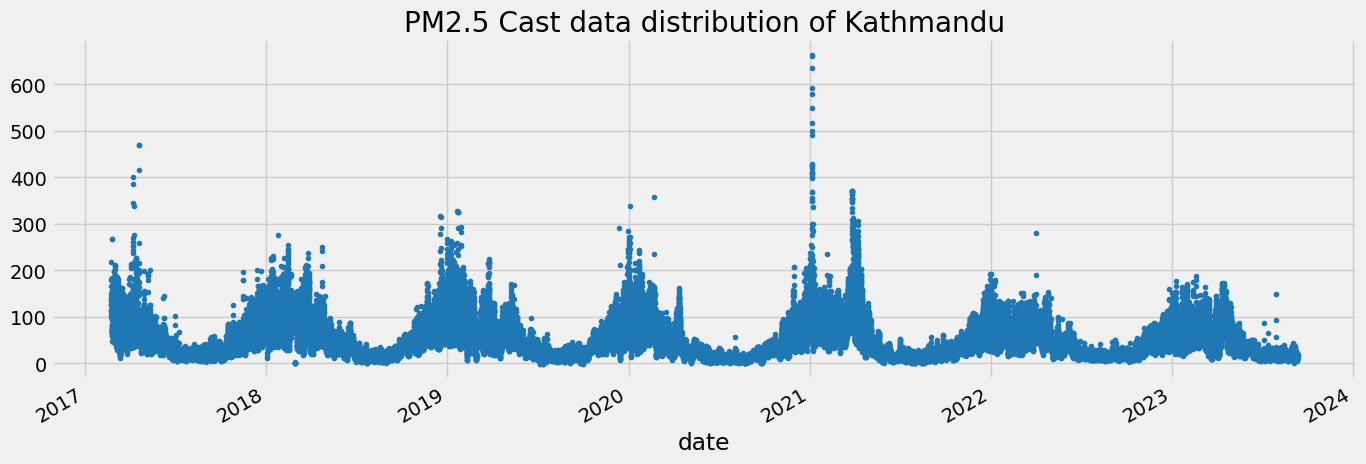

In [ ]:
df['pm_cast'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PM2.5 Cast data distribution of Kathmandu')
plt.show()

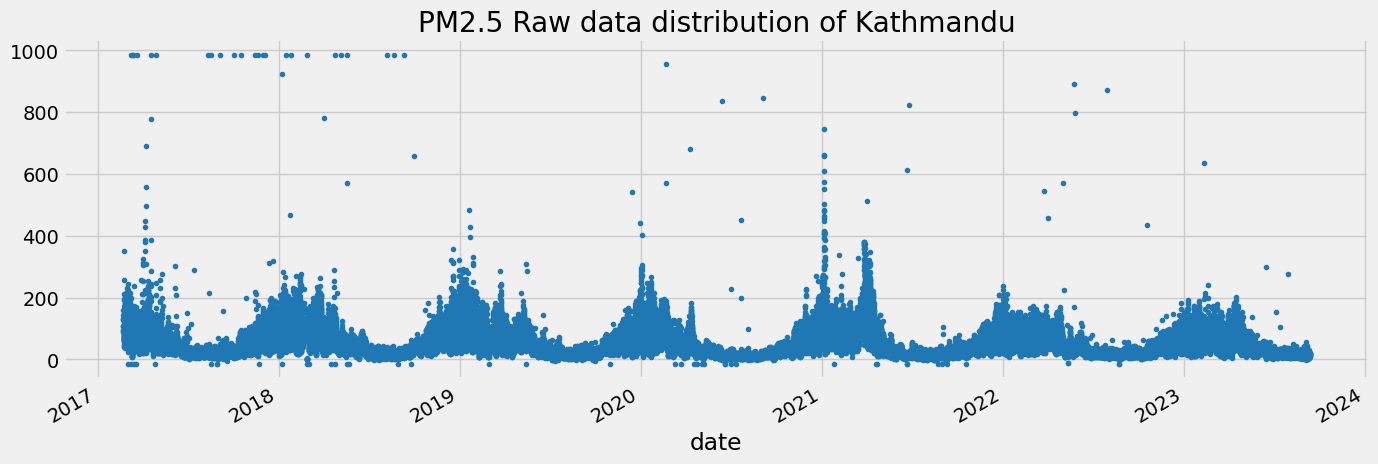

In [ ]:
df['pm_raw'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PM2.5 Raw data distribution of Kathmandu')
plt.show()

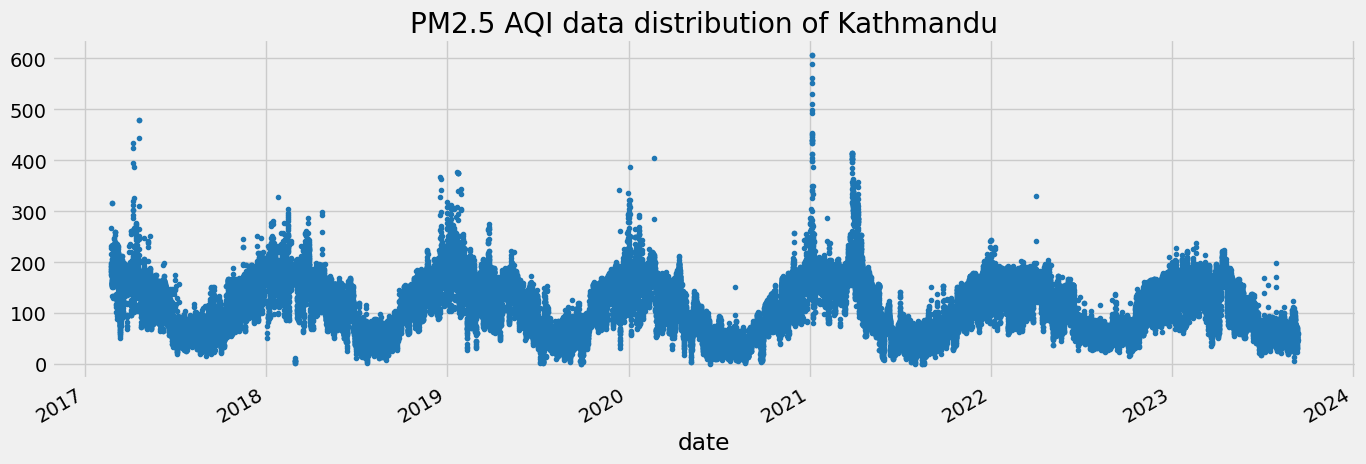

In [ ]:
df['pm_aqi'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='PM2.5 AQI data distribution of Kathmandu')
plt.show()

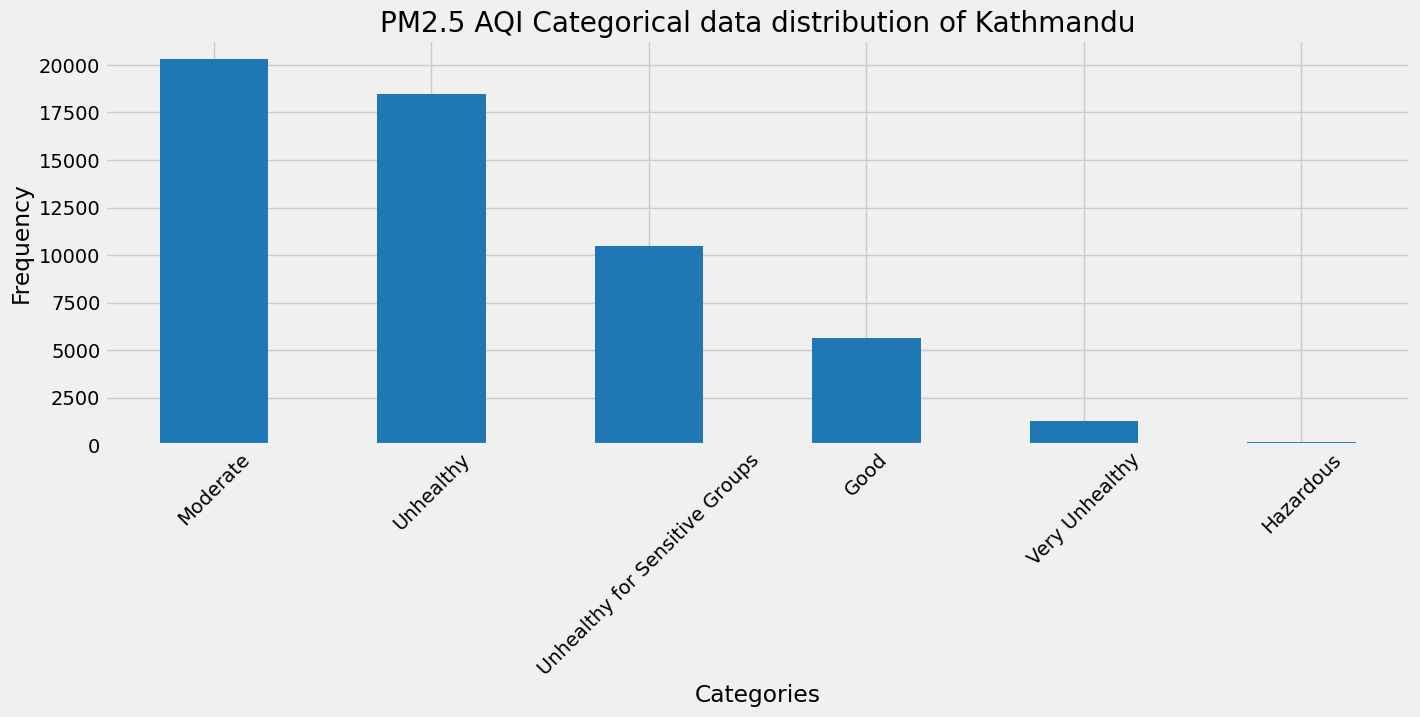

In [ ]:
df['pm_aqi_category'].value_counts().plot(kind='bar',
                                 figsize=(15, 5),
                                 color=color_pal[0],
                                 title='PM2.5 AQI Categorical data distribution of Kathmandu')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


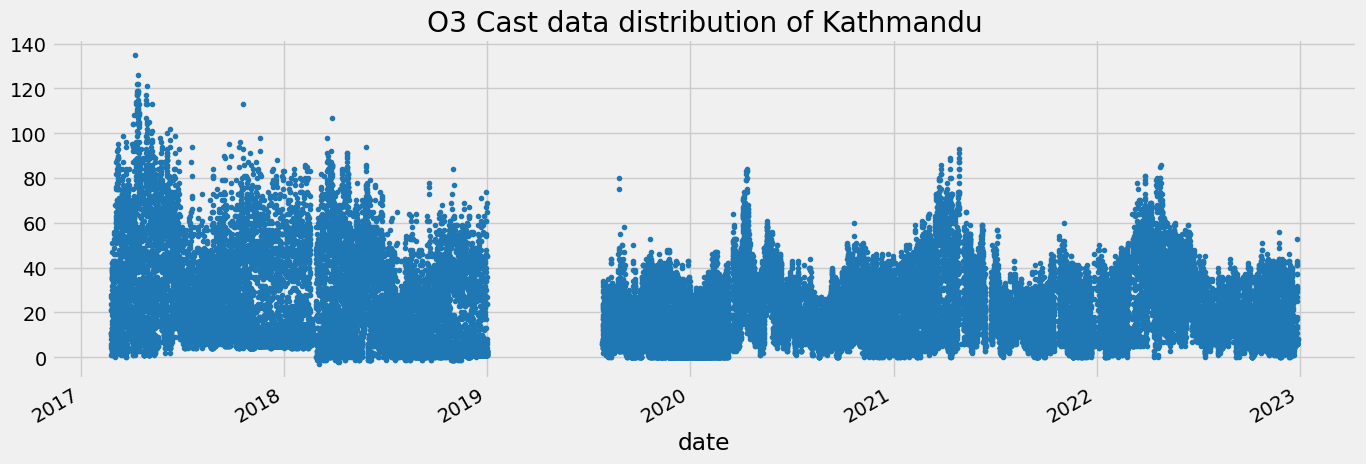

In [ ]:
df['o3_cast'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='O3 Cast data distribution of Kathmandu')
plt.show()

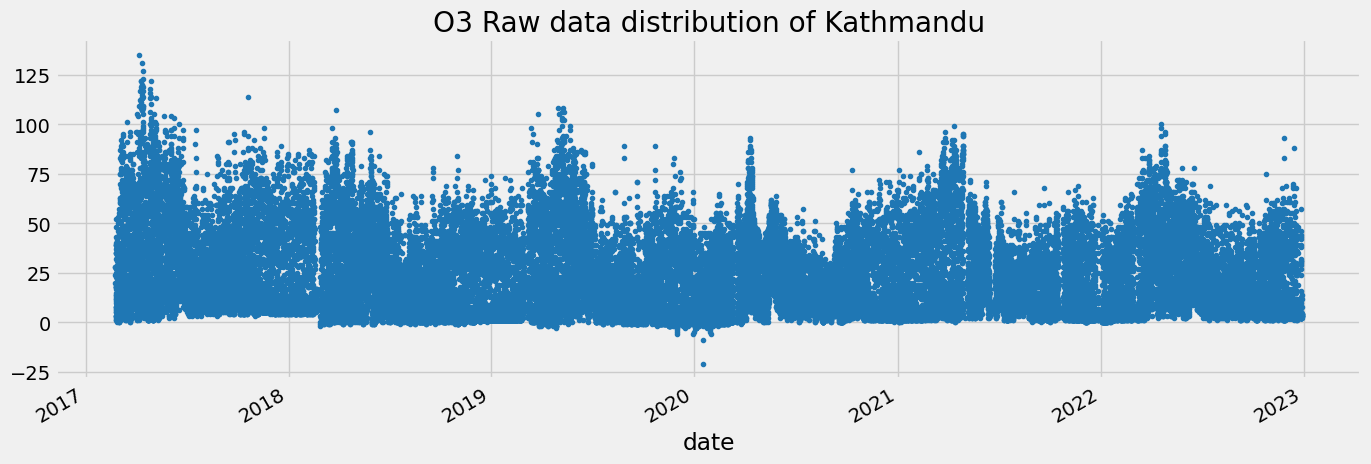

In [ ]:
df['o3_raw'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='O3 Raw data distribution of Kathmandu')
plt.show()

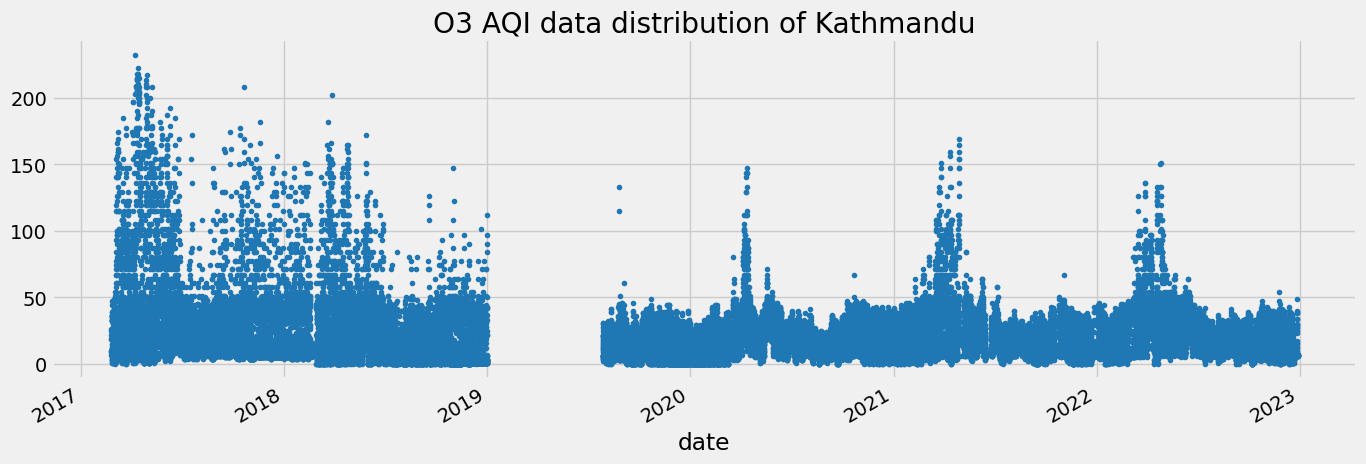

In [ ]:
df['o3_aqi'].plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='O3 AQI data distribution of Kathmandu')
plt.show()

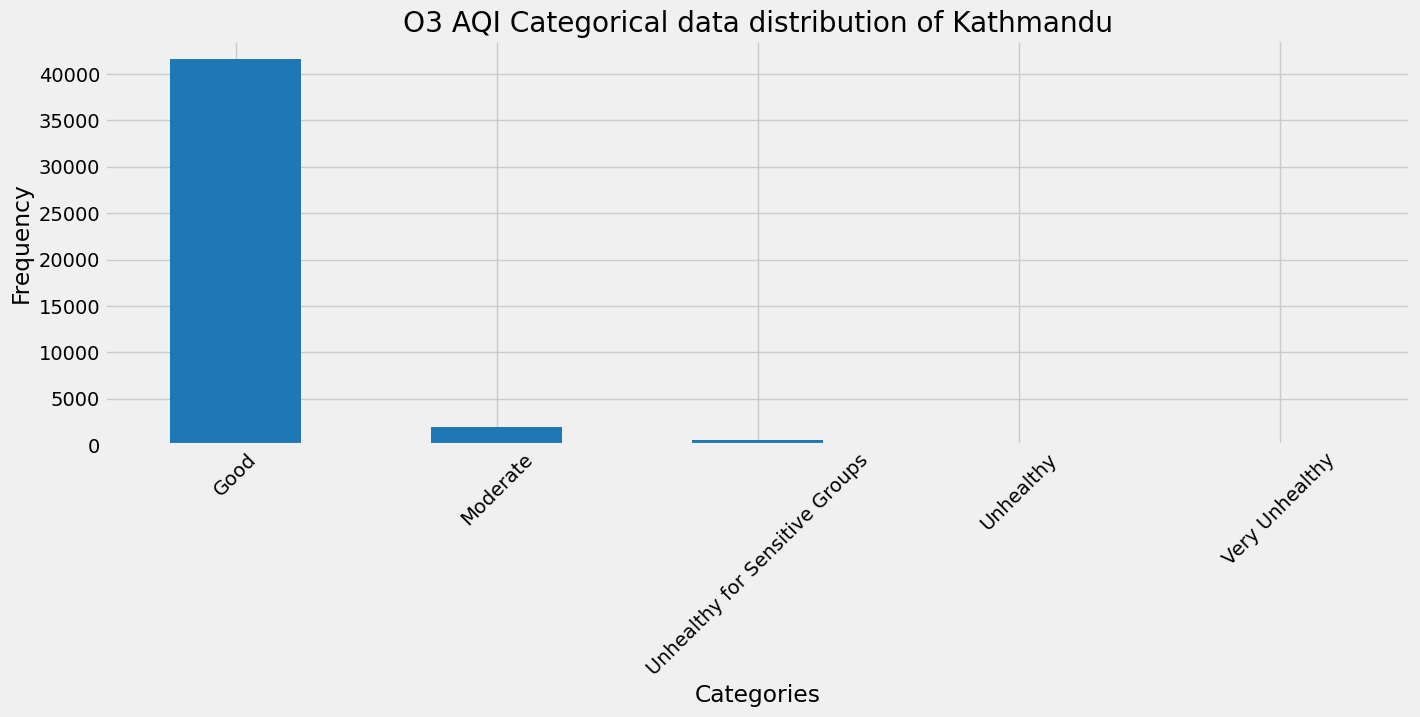

In [ ]:
df['o3_aqi_category'].value_counts().plot(kind='bar',
                                 figsize=(15, 5),
                                 color=color_pal[0],
                                 title='O3 AQI Categorical data distribution of Kathmandu')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.to_csv('Main_AQI_v1.csv')